<a href="https://colab.research.google.com/github/vikpy/DLSem3/blob/master/Classwork_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Sigmoid Function 
import numpy as np

x = np.array([1, -1, 0.001])
s = 1/(1 + np.exp(-x))
s

array([0.73105858, 0.26894142, 0.50025   ])

In [ ]:
image = np.array([
                  [
                   [1,1,1],
                   [1,1, 1],
                   [1,1, 1]

                  ],
                  [
                   [1,1, 1],
                   [1,1, 1],
                   [1,1, 1]

                  ],
                  [
                   [1,1, 1],
                   [1,1, 1],
                   [1,1, 1]

                  ],
])
image

array([[[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]],

       [[1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]]])

In [ ]:
v = image.reshape(image.shape[0]*image.shape[1]*image.shape[2], 1)
v

In [ ]:
data = np.random.random((1000, 10))
label = np.random.randint(2, size=(1000,1))

In [ ]:
data.shape

(1000, 10)

In [ ]:
#First neural network building blocks
from keras.models import Sequential 
from keras.layers import Dense 

model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=10, activation='sigmoid', input_dim=10))
#creation of hidden layer with 3 nodes and sigmoid activation
#Z[2] = W[2]A[1] + b[2]
#yhat = A[2] = sigmoid(Z[2])
model.add(Dense(units=1, activation='sigmoid'))

In [ ]:
model.compile(loss="binary_crossentropy", optimizer='sgd', metrics=['accuracy'])

In [ ]:
# X is data, y=label, epoch is iterations over the data 
model.fit(data, label, epochs=10)

Epoch 1/10
1000/1000 [==============================] - 0s 323us/step - loss: 0.7185 - accuracy: 0.5070
Epoch 2/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.7073 - accuracy: 0.5070
Epoch 3/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.7011 - accuracy: 0.5080
Epoch 4/10
1000/1000 [==============================] - 0s 42us/step - loss: 0.6979 - accuracy: 0.5110
Epoch 5/10
1000/1000 [==============================] - 0s 33us/step - loss: 0.6958 - accuracy: 0.5150
Epoch 6/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6948 - accuracy: 0.5140
Epoch 7/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6940 - accuracy: 0.5080
Epoch 8/10
1000/1000 [==============================] - 0s 34us/step - loss: 0.6937 - accuracy: 0.5120
Epoch 9/10
1000/1000 [==============================] - 0s 35us/step - loss: 0.6936 - accuracy: 0.5150
Epoch 10/10
1000/1000 [==============================] - 0s 33us/step - 

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 11        
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


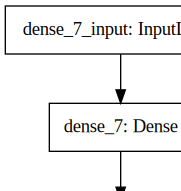

In [ ]:
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG  

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
from keras import models 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.datasets import mnist 


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
print(f"X train shape {X_train.shape}")
print(f"Y train shape { y_train.shape }")
print(f"X test shape { X_test.shape}")
print(f"Y test shape { y_test.shape}")

X train shape (60000, 28, 28)
Y train shape (60000,)
X test shape (10000, 28, 28)
Y test shape (10000,)


In [ ]:
# convert from 2D - 28*28 to 784*1 
X_train = X_train.reshape((X_train.shape[0], 28*28))
X_test = X_test.reshape((X_test.shape[0], 28*28))

# Normalize 
X_train = X_train/255
X_test = X_train/255

# Cateogorical to one hot encoded 

y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train, 10)


In [ ]:
# A simple logistic regression
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=10, activation='sigmoid', input_dim=784))

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=50, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 2s 46us/step - loss: 1.1963 - accuracy: 0.7317 - val_loss: 0.6370 - val_accuracy: 0.8648
Epoch 2/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.5713 - accuracy: 0.8671 - val_loss: 0.4731 - val_accuracy: 0.8875
Epoch 3/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.4723 - accuracy: 0.8812 - val_loss: 0.4167 - val_accuracy: 0.8951
Epoch 4/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.4280 - accuracy: 0.8883 - val_loss: 0.3864 - val_accuracy: 0.9003
Epoch 5/50
48000/48000 [==============================] - 2s 45us/step - loss: 0.4017 - accuracy: 0.8937 - val_loss: 0.3678 - val_accuracy: 0.9043
Epoch 6/50
48000/48000 [==============================] - 2s 44us/step - loss: 0.3838 - accuracy: 0.8967 - val_loss: 0.3539 - val_accuracy: 0.9068
Epoch 7/50
48000/48000 [==============================] - 2s 44us/st

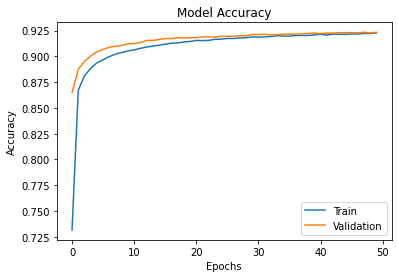

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

In [ ]:
from keras import models 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))
print(X_train.shape)
print(X_test.shape)

# Normalize 
X_train = X_train.astype('float32')/255
X_test =  X_test.astype('float32')/255

# Cateogorical to one hot encoded 

y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train, 10)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 3072)
(10000, 3072)


In [ ]:
y_test.shape[1]

10

In [ ]:
# A simple logistic regression
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='sigmoid', input_dim=3072))
model.add(Dense(units=10, activation='sigmoid'))

In [ ]:

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=50, validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 5s 125us/step - loss: 2.1886 - accuracy: 0.2281 - val_loss: 2.0676 - val_accuracy: 0.2890
Epoch 2/50
40000/40000 [==============================] - 5s 126us/step - loss: 1.9912 - accuracy: 0.3128 - val_loss: 1.9440 - val_accuracy: 0.3219
Epoch 3/50
40000/40000 [==============================] - 5s 125us/step - loss: 1.8991 - accuracy: 0.3418 - val_loss: 1.8800 - val_accuracy: 0.3419
Epoch 4/50
40000/40000 [==============================] - 5s 126us/step - loss: 1.8514 - accuracy: 0.3551 - val_loss: 1.8447 - val_accuracy: 0.3598
Epoch 5/50
40000/40000 [==============================] - 5s 128us/step - loss: 1.8188 - accuracy: 0.3679 - val_loss: 1.8202 - val_accuracy: 0.3690
Epoch 6/50
40000/40000 [==============================] - 5s 127us/step - loss: 1.7938 - accuracy: 0.3766 - val_loss: 1.7978 - val_accuracy: 0.3739
Epoch 7/50
40000/40000 [==============================] - 5s 1

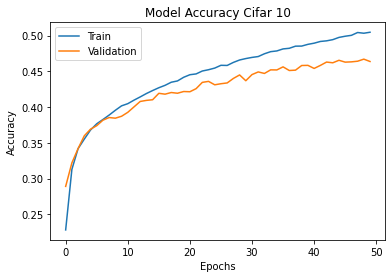

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy Cifar 10")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

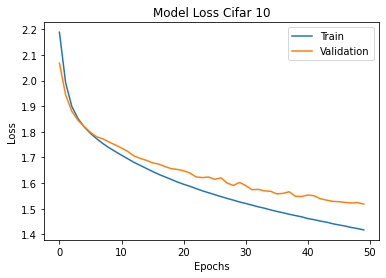

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss Cifar 10")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

In [ ]:
from sklearn.datasets import load_iris

iris_data = load_iris()

iris_data.data.shape
iris_data.target.shape

x = iris_data.data
y1 = iris_data.target.reshape(-1, 1)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
y  = encoder.fit_transform(y1)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)



In [ ]:
X_train.shape

(120, 3)

In [ ]:
# A simple logistic regression
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=200, activation='sigmoid', input_dim=4))
model.add(Dense(units=3, activation='sigmoid'))

In [ ]:

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=1000, validation_split=0.2)

Train on 96 samples, validate on 24 samples
Epoch 1/1000
96/96 [==============================] - 0s 679us/step - loss: 0.9870 - accuracy: 0.5417 - val_loss: 0.9963 - val_accuracy: 0.4583
Epoch 2/1000
96/96 [==============================] - 0s 77us/step - loss: 0.9835 - accuracy: 0.6875 - val_loss: 0.9929 - val_accuracy: 0.5000
Epoch 3/1000
96/96 [==============================] - 0s 76us/step - loss: 0.9838 - accuracy: 0.4375 - val_loss: 0.9900 - val_accuracy: 0.5000
Epoch 4/1000
96/96 [==============================] - 0s 73us/step - loss: 0.9813 - accuracy: 0.6875 - val_loss: 0.9863 - val_accuracy: 0.5000
Epoch 5/1000
96/96 [==============================] - 0s 73us/step - loss: 0.9753 - accuracy: 0.5938 - val_loss: 0.9831 - val_accuracy: 0.5000
Epoch 6/1000
96/96 [==============================] - 0s 73us/step - loss: 0.9736 - accuracy: 0.6875 - val_loss: 0.9799 - val_accuracy: 0.5000
Epoch 7/1000
96/96 [==============================] - 0s 82us/step - loss: 0.9721 - accuracy: 0.6

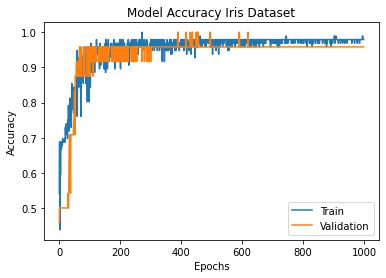

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["accuracy"])
plt.plot(model.history.history["val_accuracy"])
plt.title("Model Accuracy Iris Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

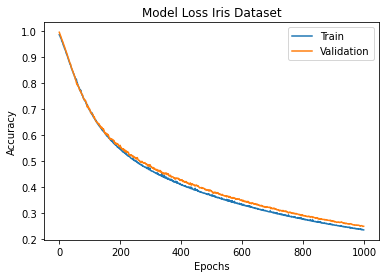

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title("Model Loss Iris Dataset")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train", "Validation"], loc="best")
plt.show()

Activation

In [ ]:
x = np.array([
    [9, 2, 5, 0, 0],
    [7, 5, 0, 0, 0]       
])

In [ ]:
s = 1/(1 + np.exp(-x))
print(s)

[[0.99987661 0.88079708 0.99330715 0.5        0.5       ]
 [0.99908895 0.99330715 0.5        0.5        0.5       ]]


In [ ]:
x_exp = np.exp(x)
x_sum = np.sum(x_exp, axis=1, keepdims=True)
s = x_exp / x_sum
print(s)

[[9.80897665e-01 8.94462891e-04 1.79657674e-02 1.21052389e-04
  1.21052389e-04]
 [8.78679856e-01 1.18916387e-01 8.01252314e-04 8.01252314e-04
  8.01252314e-04]]


In [ ]:
# Try out different activation functions and note the accuracy 

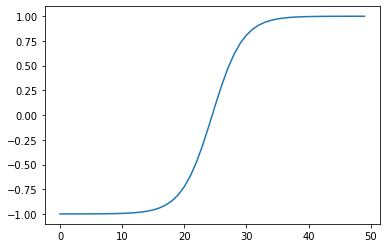

In [ ]:
# Tanh H

import matplotlib.pyplot as plt

x = np.linspace(-5, 5)
x = np.tanh(x)
plt.plot(x)

Model Testing

In [ ]:
from keras import models 
from keras.layers import Dense 
from keras.utils import to_categorical
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.reshape((50000, 32*32*3))
X_test = X_test.reshape((10000, 32*32*3))
print(X_train.shape)
print(X_test.shape)

# Normalize 
X_train = X_train.astype('float32')/255
X_test =  X_test.astype('float32')/255

# Cateogorical to one hot encoded 

y_test = to_categorical(y_test, 10)
y_train = to_categorical(y_train, 10)

# Model Developing 
# A simple logistic regression
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='relu', input_dim=3072, kernel_initializer="random_uniform", bias_initializer="random_uniform"))    # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax', kernel_initializer="random_uniform", bias_initializer="random_uniform"))    # kernel_initializer="zeros", bias_initializer="zeros", 

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=20, validation_split=0.2)

(50000, 3072)
(10000, 3072)
Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 6s 158us/step - loss: 2.0109 - accuracy: 0.2795 - val_loss: 1.8867 - val_accuracy: 0.3221
Epoch 2/20
40000/40000 [==============================] - 7s 178us/step - loss: 1.8167 - accuracy: 0.3553 - val_loss: 1.7929 - val_accuracy: 0.3662
Epoch 3/20
40000/40000 [==============================] - 5s 125us/step - loss: 1.7329 - accuracy: 0.3899 - val_loss: 1.7444 - val_accuracy: 0.3805
Epoch 4/20
40000/40000 [==============================] - 5s 128us/step - loss: 1.6750 - accuracy: 0.4099 - val_loss: 1.6726 - val_accuracy: 0.4139
Epoch 5/20
40000/40000 [==============================] - 5s 127us/step - loss: 1.6302 - accuracy: 0.4274 - val_loss: 1.6407 - val_accuracy: 0.4245
Epoch 6/20
40000/40000 [==============================] - 5s 131us/step - loss: 1.5983 - accuracy: 0.4381 - val_loss: 1.6125 - val_accuracy: 0.4349
Epoch 7/20
40000/40000 [==========

We can set the kernel initializations to all "ones"

We can set them to constant values as well.


In [ ]:
# setting all ones 
initial = keras.initializers.Constant(value=1)
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='relu', input_dim=3072, kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax', kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=20, validation_split=0.2)

# setting to a constal value

initial = keras.initializers.Constant(value=0.45)
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='relu', input_dim=3072, kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax', kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=20, validation_split=0.2)


# Pick values from normal distribution

initial = keras.initializers.RandomNormal(mean=0.0, stddev=0.25)
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='relu', input_dim=3072, kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax', kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=20, validation_split=0.2)

# Taking values from the random interval 

initial = keras.initializers.RandomUniform(minvalue=-0.05, maxvalue=0.05)
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='relu', input_dim=3072, kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax', kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=20, validation_split=0.2)



# Truncated Normal Distribution, any value beyond 99.5 or 2 std deviations 


initial = keras.initializers.TruncatedNormal(mean=0.0, stddev=0.1)
model = Sequential()
#creation of first hidden layer with 10 nodes and sigmoid activation 
# Z[1] = W[1]X + b
# A[1] = sigmoid(Z[1])
model.add(Dense(units=100, activation='relu', input_dim=3072, kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 
model.add(Dense(units=10, activation='softmax', kernel_initializer=initial, bias_initializer=initial))    # kernel_initializer="zeros", bias_initializer="zeros", 

model.compile(loss="categorical_crossentropy", optimizer='sgd', metrics=['accuracy'])

model.fit(X_train,y_train, epochs=20, validation_split=0.2)